In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('seaborn')
import numpy as np
from config import (user, password, host, port, database)

In [2]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
engine = create_engine(f'postgresql://{user}:{password}@{host}:{port}/{database}')
conn = engine.connect()

In [3]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['employees', 'dept_emp', 'departments', 'dept_manager', 'salaries', 'titles']

In [4]:
# Use Inspector to print the column names and types in salaries
columns = inspector.get_columns('salaries')
for c in columns:
    print(c['name'], c["type"])

emp_no INTEGER
salary INTEGER


In [5]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Salary = Base.classes.salaries

In [6]:
# Start a session to query the database
session = Session(engine)

In [7]:
# Query salary and save the query into results
results = session.query(Salary.salary).\
    order_by(Salary.salary.desc()).all()

In [8]:
# Unpack the salary from results and save into a list
salary = [int(result[0]) for result in results]

## Create a histogram to visualize the most common salary ranges for employees.

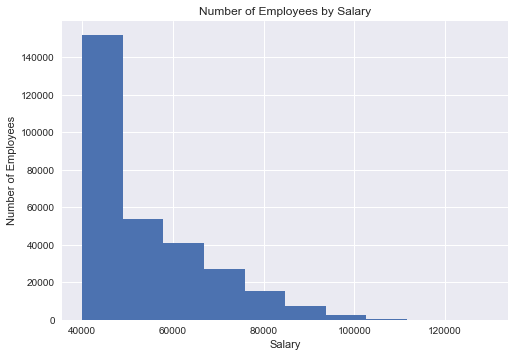

In [11]:
fig, ax = plt.subplots()
ax.set_xlabel("Salary")
ax.set_ylabel("Number of Employees")
ax.set_title("Number of Employees by Salary")
plt.hist(salary)
plt.show()

## Create a bar chart of average salary by title.